In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Credit_Risk.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        print('\n'+feature + ' value counts: ')
        print(data[feature].value_counts())
    


Loan_ID value counts: 
LP001265    1
LP002219    1
LP002211    1
LP002689    1
LP002945    1
           ..
LP001532    1
LP001990    1
LP001238    1
LP001516    1
LP002347    1
Name: Loan_ID, Length: 614, dtype: int64

Gender value counts: 
Male      489
Female    112
Name: Gender, dtype: int64

Married value counts: 
Yes    398
No     213
Name: Married, dtype: int64

Dependents value counts: 
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education value counts: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed value counts: 
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area value counts: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status value counts: 
Y    422
N    192
Name: Loan_Status, dtype: int64


In [7]:
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


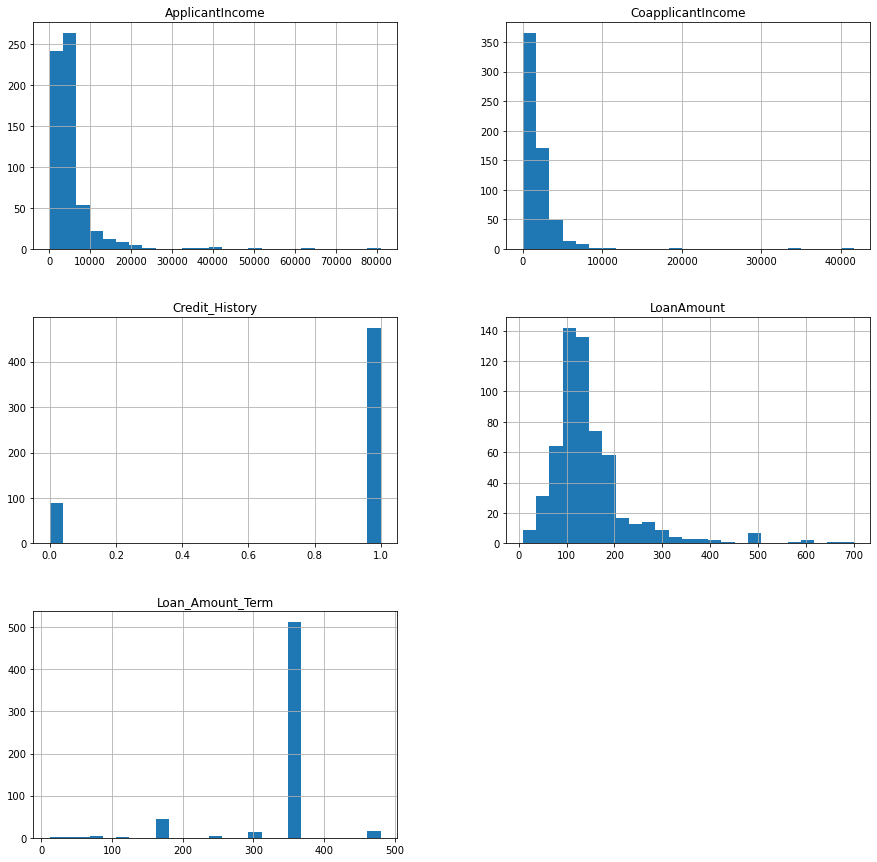

In [8]:
data.hist(bins=25, figsize=(15,15))
plt.show()

Normilize the LoanAmount

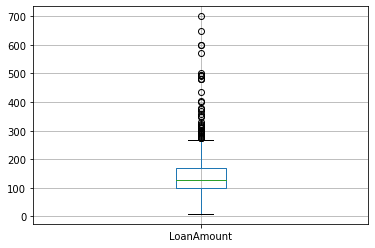

In [9]:
data.boxplot(column='LoanAmount')

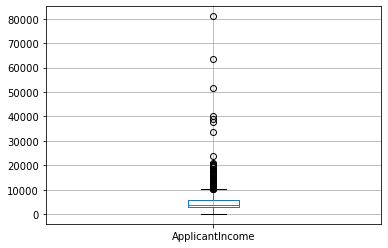

In [10]:
data.boxplot(column='ApplicantIncome')

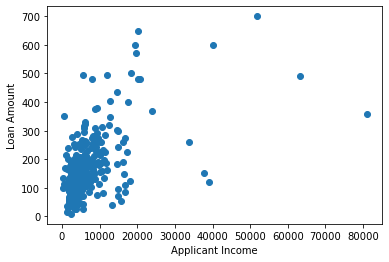

In [11]:
plt.scatter(data['ApplicantIncome'] , data['LoanAmount'] )
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

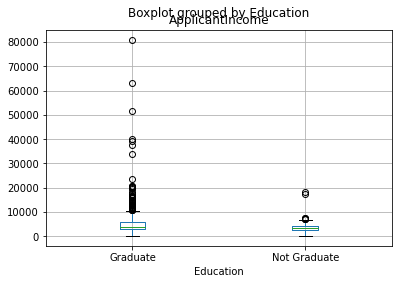

In [12]:
#Relation between ApplicantIncome and Education
data.boxplot(column='ApplicantIncome', by='Education')

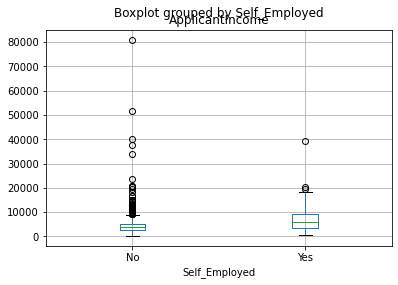

In [13]:
#Relation between ApplicantIncome and Education
data.boxplot(column='ApplicantIncome', by='Self_Employed')

Gender

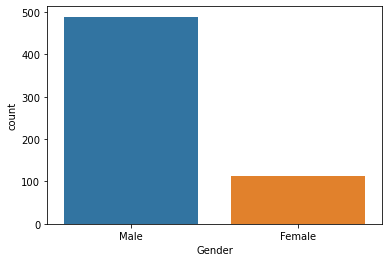

In [14]:
import seaborn as sns

ax = sns.countplot(x="Gender", data=data)

Married

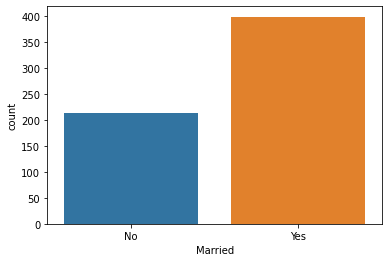

In [15]:

ax = sns.countplot(x="Married", data=data)

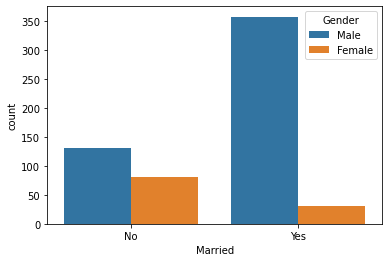

In [16]:
ax = sns.countplot(x="Married",hue="Gender", data=data)

Education

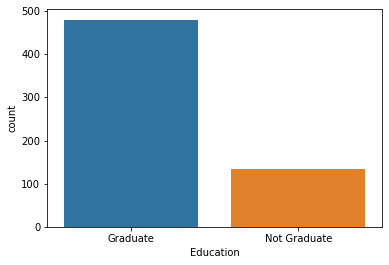

In [17]:
ax = sns.countplot(x="Education", data=data)

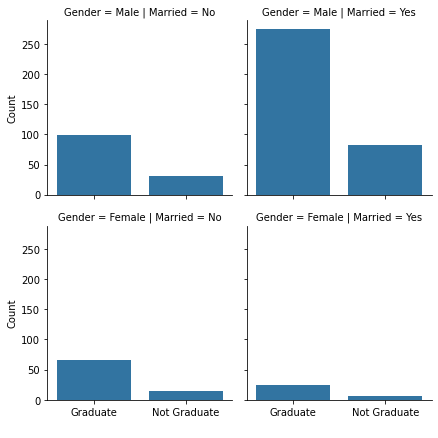

In [18]:
g = sns.FacetGrid(data, col="Married", row="Gender")
g.map_dataframe(sns.countplot, x="Education")
g.set_axis_labels(" ", "Count");

Self Employed

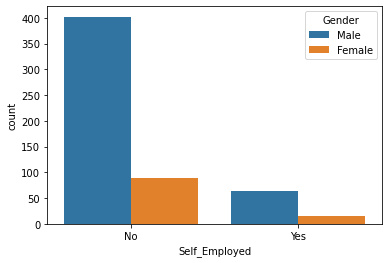

In [19]:
ax = sns.countplot(x="Self_Employed",hue="Gender", data=data)

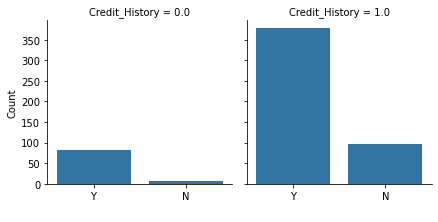

In [20]:
g = sns.FacetGrid(data, col="Credit_History",)
g.map_dataframe(sns.countplot, x="Loan_Status")
g.set_axis_labels(" ", "Count");

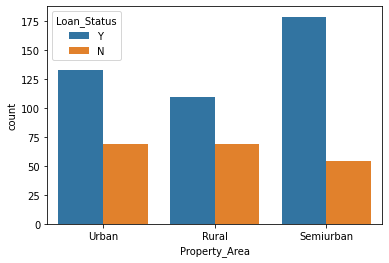

In [21]:
ax = sns.countplot(x="Property_Area",hue="Loan_Status", data=data)

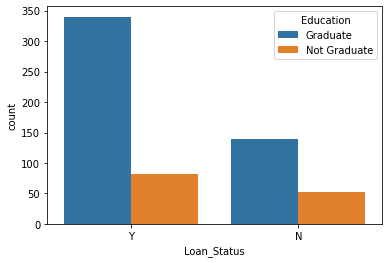

In [22]:
ax = sns.countplot(x="Loan_Status",hue="Education", data=data)

Handling Missing Values

In [23]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [25]:
data.drop(['Loan_ID'],inplace=True,axis=1)

In [26]:
cat_columns=[]
for i in data.columns:
    if data[i].dtype == 'object':
        cat_columns.append(i)
cat_columns.append('Credit_History')
cat_columns.append('Loan_Amount_Term')

In [27]:
#filling categorical values with mode
for i in cat_columns:
    data[i].fillna(data[i].mode()[0],inplace = True)

In [28]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
#filling null values with mean
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [30]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
data.Loan_Status = data.Loan_Status.replace({"Y": 1, "N" : 0})

data.Gender = data.Gender.replace({"Male": 1, "Female" : 0})

data.Married = data.Married.replace({"Yes": 1, "No" : 0})

data.Self_Employed = data.Self_Employed.replace({"Yes": 1, "No" : 0})

In [32]:
data["Rural_Area"]=data["Property_Area"].map({'Rural':1,'Urban':0,'Semiurban':0})
data["Urban_Area"]=data["Property_Area"].map({'Rural':0,'Urban':1,'Semiurban':0})
data["Semiurban_Area"]=data["Property_Area"].map({'Rural':0,'Urban':0,'Semiurban':1})

In [33]:
data=data.drop('Property_Area',axis=1)

In [34]:
from sklearn.preprocessing import LabelEncoder
f = ['Dependents','Education']
le=LabelEncoder()
for i in f:
    data[i] = le.fit_transform(data[i])

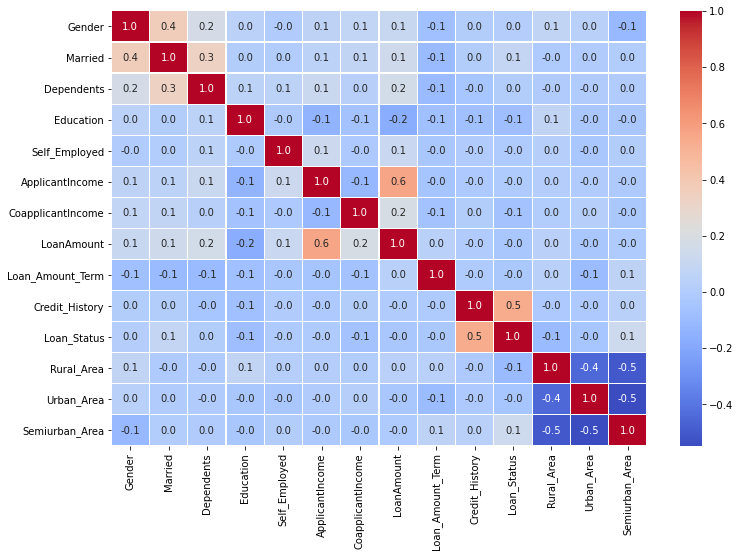

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [36]:
y=data['Loan_Status']
X=data.drop('Loan_Status',axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

lr_model = lr.fit(X_train,y_train)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(y_test,lr_model.predict(X_test)))
accuracy_score(y_test, lr_model.predict(X_test))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



0.7886178861788617

### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [43]:
print(classification_report(y_test,knn_model.predict(X_test)))
accuracy_score(y_test, knn_model.predict(X_test))

              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



0.7723577235772358

 Model Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [46]:
print("Best score:" + str(knn_cv.best_score_))
print("Best params: " + str(knn_cv.best_params_))

Best score:0.7882857142857143
Best params: {'n_neighbors': 12}


In [47]:
knn = KNeighborsClassifier(8)
knn_tuned = knn.fit(X_train, y_train)

In [48]:
accuracy_score(y_test, knn_tuned.predict(X_test))

0.7723577235772358

### Random Forest Tree

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state =42)

rf_model=rf.fit(X_train,y_train)

In [50]:
print(classification_report(y_test,rf_model.predict(X_test)))
accuracy_score(y_test, rf_model.predict(X_test))

              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



0.7723577235772358

Model Tuning

In [51]:
rf_params ={'n_estimators':[50,100,200,300],
           'max_features':["auto", "sqrt", "log2"],
           'max_depth':[3,5,6,7,8,10]}
rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, rf_params,  cv = 10, n_jobs = -1, verbose = 2) 
rf_cv_model=rf_cv.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [52]:
print("Best score:" + str(rf_cv_model.best_score_))
print("Best params: " + str(rf_cv_model.best_params_))

Best score:0.8186938775510203
Best params: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


In [53]:
rf = RandomForestClassifier(max_depth= 8, max_features= 'sqrt', n_estimators= 300)
rf_tuned = rf.fit(X_train, y_train)

In [54]:
accuracy_score(y_test, rf_tuned.predict(X_test))

0.7804878048780488

### SVC

In [55]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm_model = svm.fit(X_train, y_train)

In [56]:
print(classification_report(y_test,svm_model.predict(X_test)))
accuracy_score(y_test, svm_model.predict(X_test))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



0.7886178861788617

### XGBClassifier

In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_model=xgb.fit(X_train,y_train)

In [58]:
print(classification_report(y_test,xgb_model.predict(X_test)))
accuracy_score(y_test, xgb_model.predict(X_test))

              precision    recall  f1-score   support

           0       0.74      0.47      0.57        43
           1       0.76      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.75      0.76      0.74       123



0.7560975609756098

Model Tuning

In [59]:
param_grid = {'n_estimators':  [10,500,1000],
              'max_depth': [1, 3, 5],
              'gamma': [0, 1, 5],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

xgb_cv =  GridSearchCV(xgb, param_grid, cv=10)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [60]:
print("Best score:" + str(xgb_cv.best_score_))
print("Best params: " + str(xgb_cv.best_params_))

Best score:0.8187755102040816
Best params: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}


In [61]:
xgb = XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 1, n_estimators= 500)
xgb_tuned = xgb.fit(X_train, y_train)

In [62]:
accuracy_score(y_test, xgb_tuned.predict(X_test))

0.7967479674796748

In [63]:
models = [
    lr_model,
    knn_tuned,
    rf_tuned,
    svm_model,
    xgb_tuned     
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*30)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))


------------------------------
LogisticRegression:
Accuracy: 78.8618%
------------------------------
KNeighborsClassifier:
Accuracy: 77.2358%
------------------------------
RandomForestClassifier:
Accuracy: 78.0488%
------------------------------
SVC:
Accuracy: 78.8618%
------------------------------
XGBClassifier:
Accuracy: 79.6748%


In [64]:
y_pred = xgb_tuned.predict(X_test)